# A. Capstone Project - Build a Chinese restaurant in Paris.


## A.1 Introduction & Business Problem
The city of **Paris** is the most populated agglomeration in France and one if not the most attractive in Europe. **Paris** is a lively, diverse, dynamic city and is the financial as well as political capital of France.

> It is a **multicultural city** which provides a **lot of opportunities as well as a favorable business environment**.

The city has attracted many players in the market. It is a global hub of business and commerce. The city is a major center for banking and financial (one of the most important in Europe), retail trade, world trade, transport, tourism, real estate, new media, traditional media, advertising, legal services, accounting, insurance, theater, fashion and arts in Europe. It also means that the market is very competitive. As it is a very developed city, the cost of business is also one of the highest. 

Thus, any new commercial enterprise or expansion must be carefully analyzed. The information drawn from the analysis will allow a good understanding the business environment that helps strategically target the market. This analysis will help in risk reduction. And the return on investment will be reasonable, though.

## A.2 Political Division of Paris
The City of **Paris** like any big city is divided in many, many ways. The city itself was divided into 20 different Faubourgs and later into Arrondissments (districts) for the purpose of taxation and policing, but there were social divisions as well that were just as concrete. These divisions were influenced by the differing ideals between social groups. 
> **Understanding these divisions is important to both the political and social history of Paris.**

You will find in this report a map showing **Paris** arrondissements and a map presenting Paris neighborhoods. Paris arrondissements and districts are the administrative divisions that share Paris in 20 municipals arrondissements. Within each of its boroughs, the neighborhoods are making the charm and the reputation of the city of Paris.
The twenty arrondissements of Paris all have their own character through their tourist sites, places to go out, restaurants, and homes. Each Parisian arrondissement has four administrative districts.

> **Each of Paris' 20 administrative districts (or arrondissements) are officially divided into 4 quartiers.**

## A.3 Business Problem
City of **Paris** is famous for its excellent cuisine. Its food culture includes an array of international cuisines influenced by the city's immigrant history. **Chinese restaurants** have become so popular in France now it seems that there is one on every corner, not only in major cities but also in smaller cities. 

Starting a **Chinese restaurant** can be a great business opportunity, but you need to distinguish yourself from others to enjoy long-term success.

If you plan a real restaurant that can demand higher prices for fresh fish or fresh foods, delivered daily from Japan or China, focus on neighborhoods and outlets that already attract a sophisticated Chinese or others client. If you plan a cheap buffet restaurant, points to the masses looking for affordable high-traffic locations with large shopping centers and other local points of interest.

My client wants **to open their business in Paris area, not necessary in the center of Paris**. So according to his need, I focus on that borough during my analysis. We define potential neighborhood based on the number of Chinese bars which are operating right in each neighborhood. **Paris** has full potential but also is a very challenging district to open a business because of high competition. New Chinese bar should be open in an area that inadequate neighborhood in this way the bar can attract more customers. 

> Therefore, **this analysis necessary to ensure that we have enough customers and that we are not so close to other Chinese places, and if we are close to others, to provide the best food in order to attract as many customers as possible.**


## A.4 Data acquisition and cleaning

As specify earlier, **Paris** has a total of **20 boroughs and 80 neighborhoods**. In order to segment the neighborhoods and explore them, we will essentially need a dataset that contains the 20 boroughs and the neighborhoods that exist in each borough as well as the latitude and longitude coordinates of each neighborhood.

* The [first dataset](https://opendata.paris.fr/explore/dataset/arrondissements/table/) consists of the 20 boroughs with their respective geographical coordinates.


* The [second dataset](https://opendata.paris.fr/explore/embed/dataset/quartier_paris/table/) consists of the 80 neighborhoods with their respective geographical coordinate, the boroughs to witch the belong.



Merging those two datasets, we finally have our dataset with all 20 boroughs and 4 neighborhoods in each.

In [2]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
import contextily
from shapely.geometry import Point, Polygon

%matplotlib inline

plt.rcParams['figure.figsize'] = 8,6

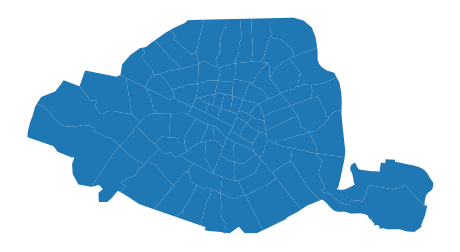

In [6]:
# Import the districts dataset
districts = gpd.read_file("./data/Paris/paris_districts_utm.geojson")

# Plot the districts dataset
districts.plot()
plt.axis('off')
plt.show()

/home/ainoa/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


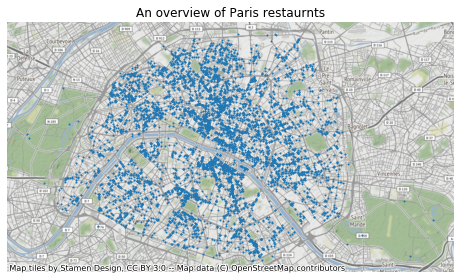

In [10]:
# Read the restaurants csv file into a DataFrame
df = pd.read_csv("./data/Paris/paris_restaurants.csv")

# Convert it to a GeoDataFrame
restaurants = gpd.GeoDataFrame(df, crs={'init': 'epsg:3857', 'no_defs': True}, geometry=gpd.points_from_xy(df.x, df.y))
restaurants = restaurants.loc[:, ['type', 'geometry']]

# Ensure the restaurants use the same CRS
restaurants = restaurants.to_crs(epsg=2154)

# Convert to the Web Mercator projection
restaurants_webmercator = restaurants.to_crs(epsg=3857)

# Plot the restaurants with a background map
ax = restaurants_webmercator.plot(markersize=1)
contextily.add_basemap(ax)
plt.axis('off')
plt.title('An overview of Paris restaurnts')
plt.show()

# References

* [Working with Geospatial Data in Python](https://www.datacamp.com/courses/working-with-geospatial-data-in-python)

* [Paris Open Data](https://opendata.paris.fr/pages/home/)